<a href="https://colab.research.google.com/github/Nids700/EDA/blob/main/nidhi_theory_da.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


file_path = 'HepatitisCdata.csv'
df = pd.read_csv(file_path)


df.head()

,Serial No,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [26]:

print(f"Dataset dimensions: {df.shape}")


print(df.describe())


print(df.info())


Dataset dimensions: (615, 15)
        Serial No    Category         Age  Sex         ALB         ALP  \
count  615.000000  615.000000  615.000000  0.0  614.000000  597.000000   
mean   308.000000    0.253659   47.408130  NaN   41.620195   68.283920   
std    177.679487    0.742420   10.055105  NaN    5.780629   26.028315   
min      1.000000    0.000000   19.000000  NaN   14.900000   11.300000   
25%    154.500000    0.000000   39.000000  NaN   38.800000   52.500000   
50%    308.000000    0.000000   47.000000  NaN   41.950000   66.200000   
75%    461.500000    0.000000   54.000000  NaN   45.200000   80.100000   
max    615.000000    3.000000   77.000000  NaN   82.200000  416.600000   

              ALT         AST         BIL         CHE        CHOL  \
count  614.000000  615.000000  615.000000  615.000000  605.000000   
mean    28.450814   34.786341   11.396748    8.196634    5.368099   
std     25.469689   33.090690   19.673150    2.205657    1.132728   
min      0.900000   10.6000

In [25]:

print(df.isnull().sum())


duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


df = df.drop_duplicates()




Serial No          0
Category           0
Age                0
Sex              615
ALB                1
ALP               18
ALT                1
AST                0
BIL                0
CHE                0
CHOL              10
CREA               0
GGT                0
PROT               1
ALT_AST_Ratio      1
dtype: int64
Number of duplicate rows: 0


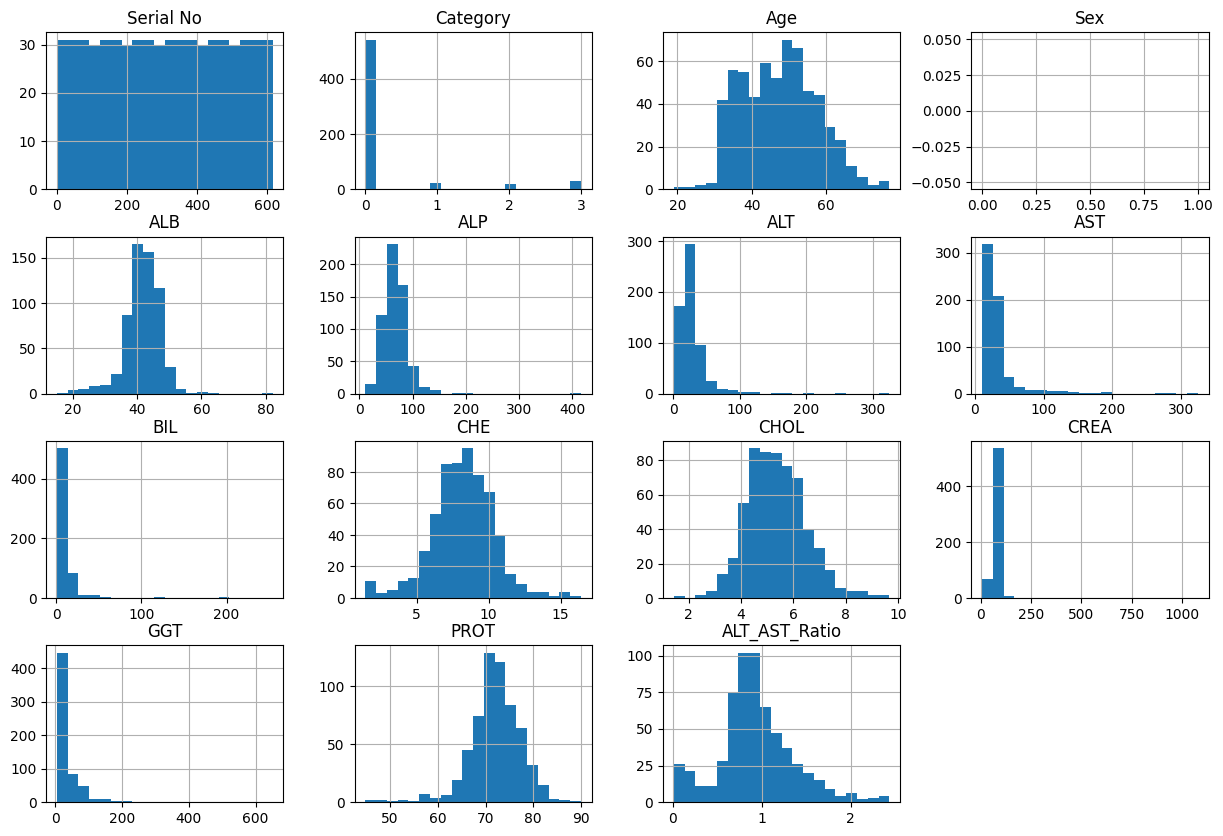

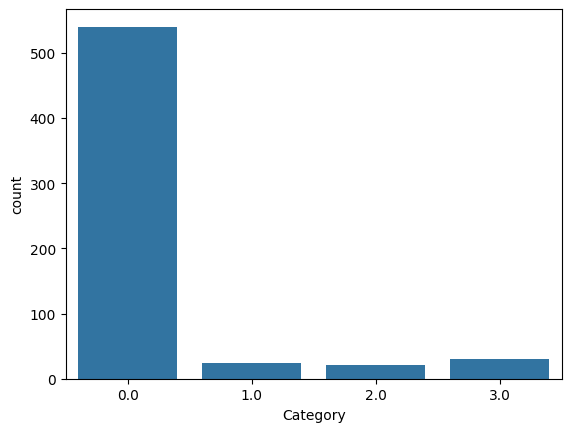

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


df.hist(figsize=(15, 10), bins=20)
plt.show()


sns.countplot(x='Category', data=df)
plt.show()


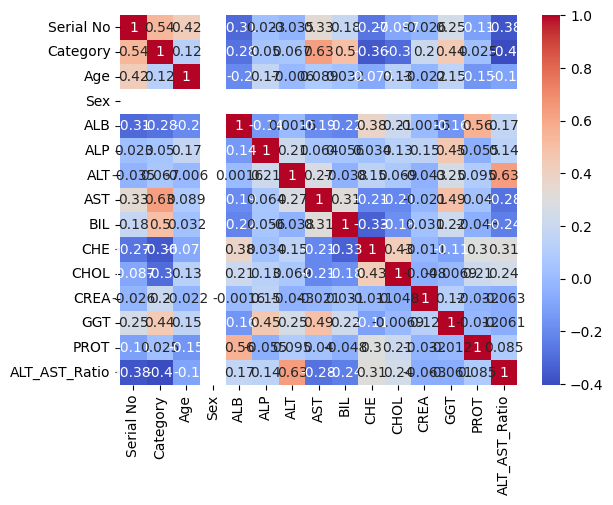

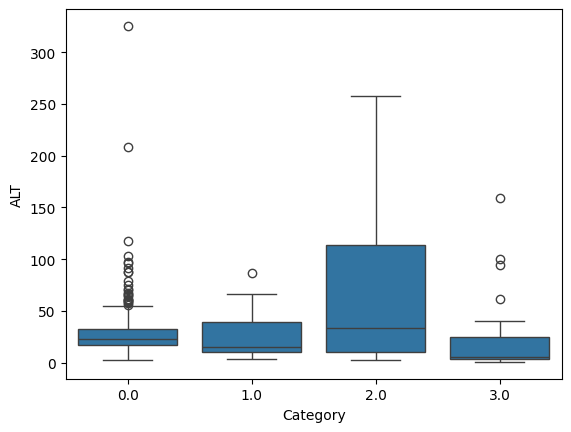

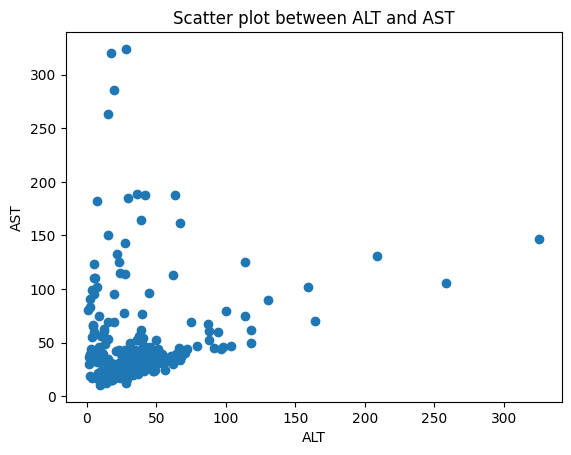

In [23]:

correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


sns.boxplot(x='Category', y='ALT', data=df)
plt.show()


plt.scatter(df['ALT'], df['AST'])
plt.xlabel('ALT')
plt.ylabel('AST')
plt.title('Scatter plot between ALT and AST')
plt.show()

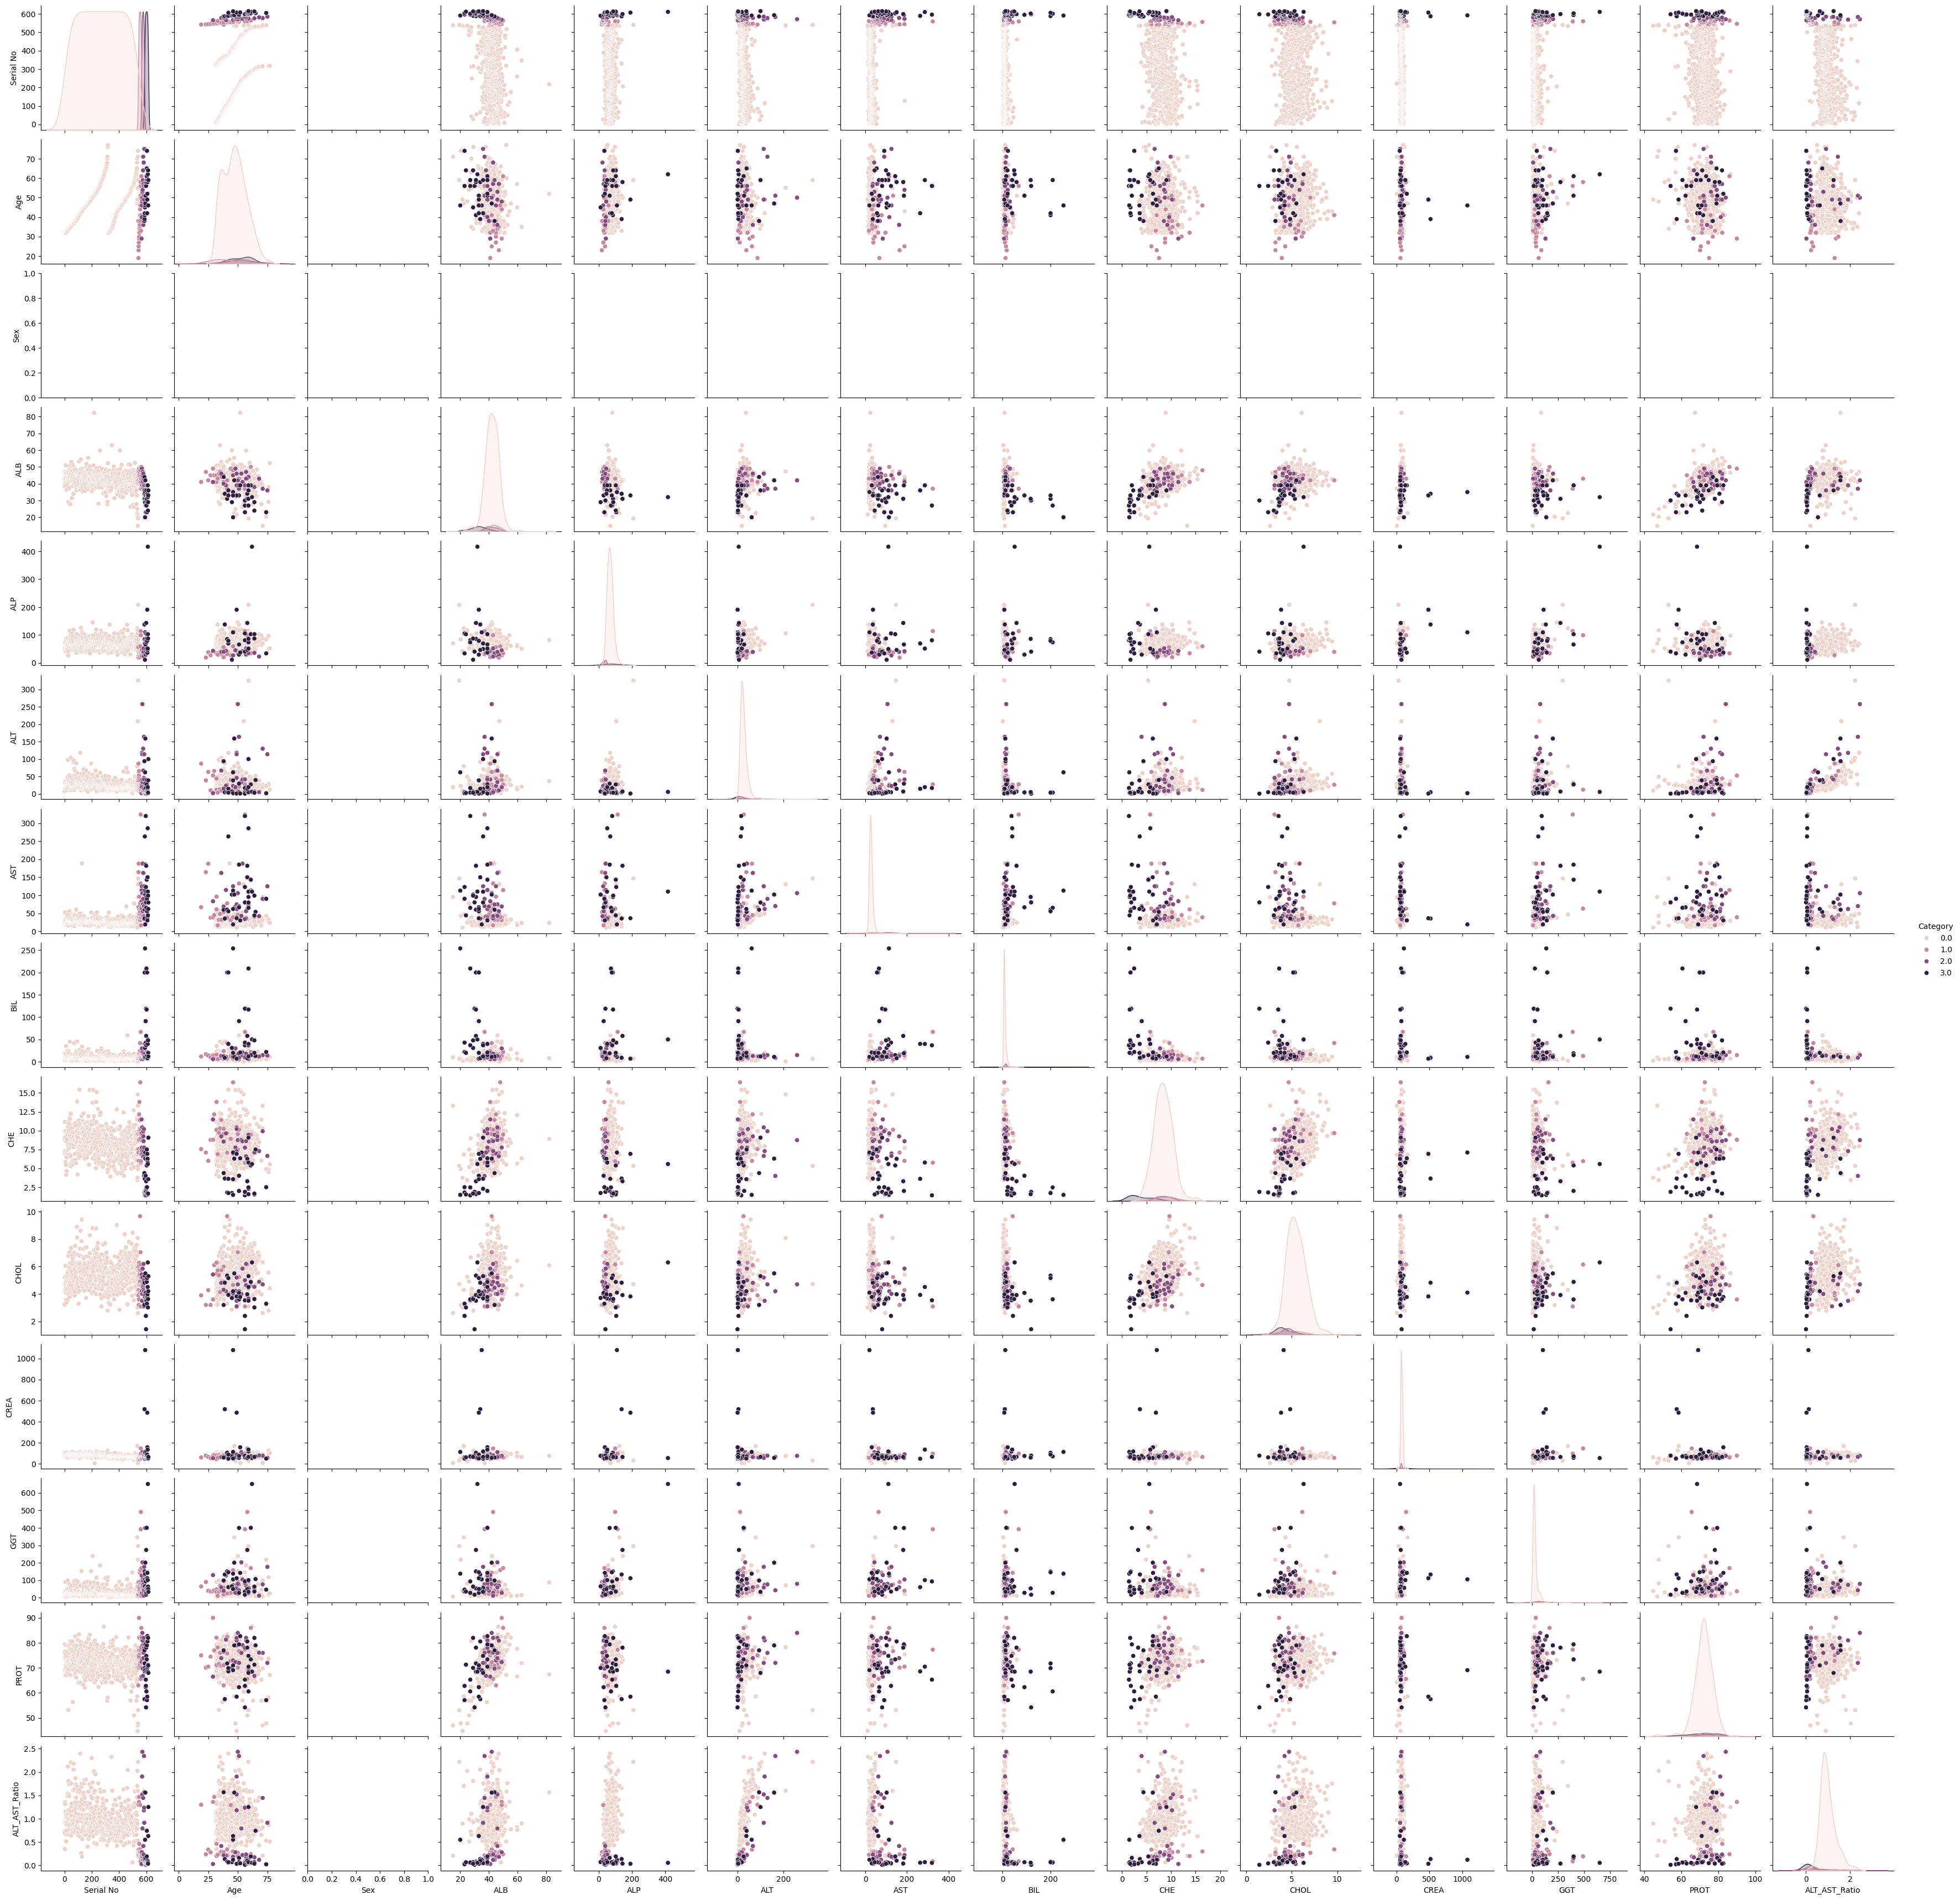

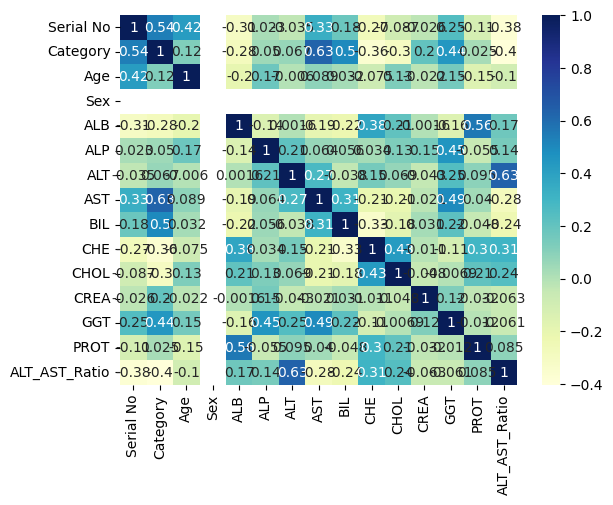

In [22]:

sns.pairplot(df, hue='Category', diag_kind='kde')
plt.show()


if df['Category'].dtype == object:
    df['Category'] = df['Category'].str.extract('(\d+)').astype(float)


for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            print(f"Column {col} cannot be converted to numeric.")

sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [20]:

df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})


In [21]:

df['ALT_AST_Ratio'] = df['ALT'] / df['AST']


In [19]:
df.to_csv("cleaned_hepatitis_data.csv", index=False)
